## Laboratorium 4

### Cel ćwiczenia
Celem ćwiczenia jest zastosowanie metody selekcji cech w klasyfikacji liści, a następnie przeprowadzenie klasyfikacji za pomocą klasyfikatora *k*NN.
Dodatkowo należy wyświetlić wyniki klasyfikacji w postaci macierzy pomyłek.

### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab[xx].ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```



### Zadanie 1

* Wybierz 10 pierwszych gatunków liści (będziesz je używać w kolejnych zadaniach) o identyfikatorach: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10.
* Znormalizuj dane w zakresie 0-1.

### Zadanie 2
* Przeprowadź selekcję cech.
> Możesz wykorzystać bibliotekę [scikit-learn](https://scikit-learn.org/stable/modules/feature_selection.html) (np. [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)).
* Dla każdej liczby cech (1-14) przeprowadz selekcje cech. Nastepnie wykonaj klasyfikacje klasyfikatorem *k*NN i znajdź optymalne *k*.
* Wyświetl wykres, gdzie na osi X znajduje się liczba cech, a na osi Y najwyższa osiągnięta dokładność (*accuracy*).
* Podaj dla jakiej liczby cech (i dla których cech) oraz dla jakiego *k* osiągnąłeś najlepszy wynik (*accuracy*).

### Zadanie 3
* Wyświetl tablicę pomyłek.

> Podpowiedź: Do wyświetlenia tablicy pomyłek możesz użyć funkcji [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) oraz [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) z biblioteki `sklearn`.

**Pamiętaj, wyniki powinny być czytelnie opisane oraz zaprezentowane graficznie (jeżeli jest taka możliwość).**

Przykład czego nie robić (na podstawie tablicy pomyłek):

**Źle** (kolumny ani wiersze nie są opisane):
```
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])
```



#Zadanie 1

In [2]:
#Ladowanie danych
import numpy as np
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
    
#Create binary vector for given classes    
chosen_id = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
binary_vector_train = np.isin(train[:,0], chosen_id)
binary_vector_test = np.isin(test[:,0], chosen_id)

#Select only given classes
train_new = train[binary_vector_train]
test_new = test[binary_vector_test]

y_train = train_new[:,0].copy()
x_train = train_new[:,2:].copy()

y_test = test_new[:,0].copy()
x_test = test_new[:,2:].copy()

print("Dlugosc zbiory treningowego (labels):",len(y_train))
print("Dlugosc zbiory treningowego (data):",len(x_train))

print("Dlugosc zbiory testowego (labels):",len(y_test))
print("Dlugosc zbiory testowego (data):",len(x_test))

#Normalize data 0-1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Fit on train data
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print("Wartosc min w zbiorze treningowym: ",np.min(x_train))
print("Wartosc max w zbiorze treningowym: ",np.max(x_train))

print("Wartosc min w zbiorze testowym: ",np.min(x_test))
print("Wartosc max w zbiorze testowym: ",np.max(x_test))

Dlugosc zbiory treningowego (labels): 671
Dlugosc zbiory treningowego (data): 671
Dlugosc zbiory testowego (labels): 517
Dlugosc zbiory testowego (data): 517
Wartosc min w zbiorze treningowym:  0.0
Wartosc max w zbiorze treningowym:  1.0000000000000002
Wartosc min w zbiorze testowym:  -0.15618629851288823
Wartosc max w zbiorze testowym:  1.087568483623526


#Zadanie 2

In [19]:
print("Liczba probek: ",len(y_train))
print("Liczba klas: :", len(np.unique(y_train)))
print("Liczba cech: ",len(x_train[0]))

import sklearn as skl
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest

def check_best_neighbours_n(x_train,y_train,x_test,y_test):
    best_acc = 0
    best_k = None
    #K nearest is reduced for efficiency from len(x_train) to 1/4 of this value
    for k in range(1,len(x_train) //4):
        K_nearest = KNeighborsClassifier(n_neighbors=k)
        K_nearest.fit(x_train, y_train)
        y_pred = K_nearest.predict(x_test)
        acc = skl.metrics.accuracy_score(y_test, y_pred)

        if acc> best_acc:
            best_acc = acc
            best_k = k

    return best_acc, best_k
    
score_dict = {}
feature_list = []
acc_list = []
k_list = []
feature_idx_list = []
for f in range(len(x_train[0])):
    print(f"Analyzing {f+1} features...") 
    #Select f best features
    selector = SelectKBest(k=f+1)
    selector.fit(x_train,y_train)

    feature_list.append(f+1) #Append tested f numbers
    
    
    #Take these features for training
    x_train_f = selector.transform(x_train)
    x_test_f = selector.transform(x_test)

    #Binary mask which features got selected
    feature_binary = selector.get_support()
    feature_indexes = np.where(feature_binary)[0]
    feature_indexes = feature_indexes.astype(int).tolist()

    
    best_acc, best_k = check_best_neighbours_n(x_train = x_train_f,
                                               y_train = y_train,
                                               x_test = x_test_f,
                                               y_test = y_test
                                              )
    acc_list.append(best_acc)
    k_list.append(best_k)
    feature_idx_list.append(feature_indexes)

score_dict["Features_idx"] = feature_idx_list
score_dict["Features"] = feature_list
score_dict["Best_k"] = k_list
score_dict["Accuracy"] = acc_list


Liczba probek:  671
Liczba klas: : 10
Liczba cech:  14
Analyzing 1 features...
Analyzing 2 features...
Analyzing 3 features...
Analyzing 4 features...
Analyzing 5 features...
Analyzing 6 features...
Analyzing 7 features...
Analyzing 8 features...
Analyzing 9 features...
Analyzing 10 features...
Analyzing 11 features...
Analyzing 12 features...
Analyzing 13 features...
Analyzing 14 features...


Best acc score: 0.816247582205029
Best k neighbours number: 16
Best feature number: 6
Selected features:  [0, 1, 2, 5, 6, 7]


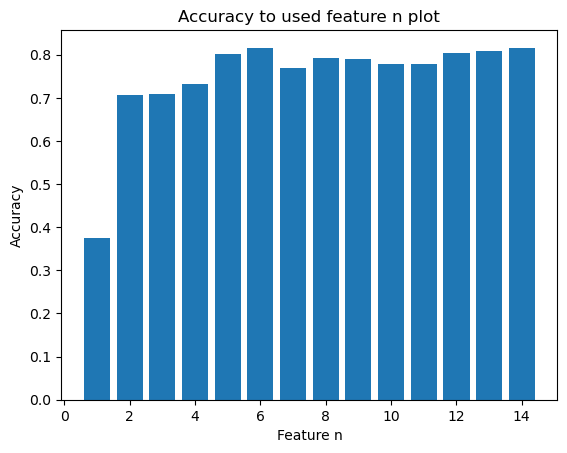

In [20]:
#Wyswielt wykres na podstawie score_dict
import matplotlib.pyplot as plt

plt.bar(score_dict["Features"],score_dict["Accuracy"])
plt.title("Accuracy to used feature n plot")
plt.xlabel("Feature n")
plt.ylabel("Accuracy")


best_score = max(score_dict["Accuracy"])
best_idx = score_dict["Accuracy"].index(best_score)
best_k = score_dict["Best_k"][best_idx]
best_features = score_dict["Features"][best_idx]
best_features_idx = score_dict["Features_idx"][best_idx]

print("Best acc score:",best_score)
print("Best k neighbours number:",best_k)
print("Best feature number:",best_features)
print("Selected features: ", best_features_idx)






In [27]:

x_test.shape

(517, 14)

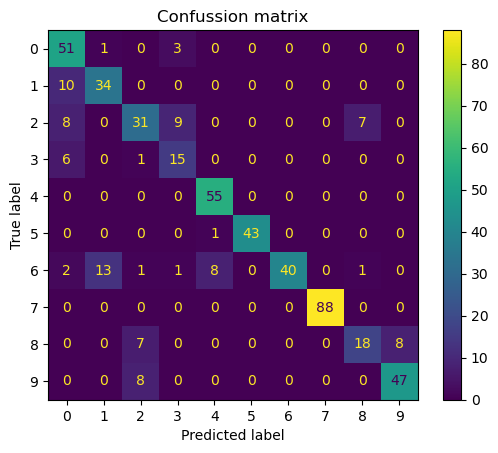

Accuracy:  0.816247582205029


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Prepare and run classifier
k = 16
selected_f = [0, 1, 2, 5, 6, 7]
K_nearest = KNeighborsClassifier(n_neighbors=k)

#Choose only given features
x_train_f = x_train[:,selected_f]
x_test_f = x_test[:,selected_f]

K_nearest.fit(x_train_f, y_train)
y_pred = K_nearest.predict(x_test_f)

acc = skl.metrics.accuracy_score(y_test, y_pred)

#Show cf
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confussion matrix")
plt.show()

print("Accuracy: ",acc)